In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats

1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [2]:
# !wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
# !wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

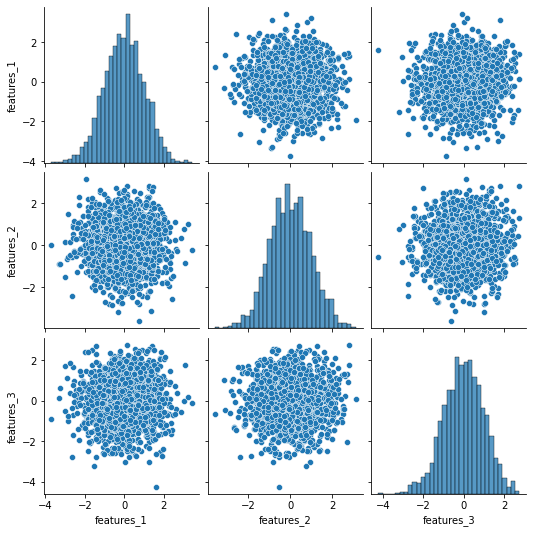

In [3]:
# Method_1
df = pd.read_csv("regression_generated.csv")
x = df.loc[:,'features_1': 'features_3']
sns.pairplot(x)

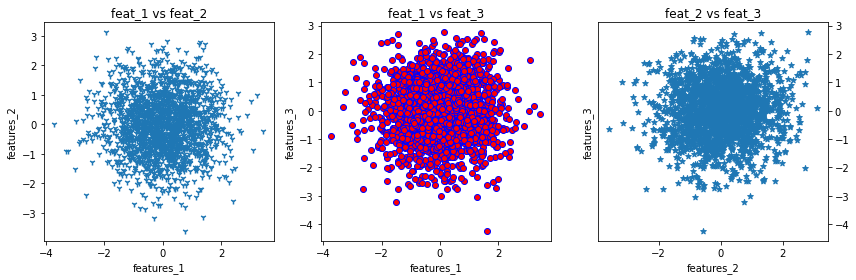

In [4]:
# method_2
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

ax[0].scatter(x=df['features_1'],y=df['features_2'], marker='1')
ax[0].set_xlabel('features_1')
ax[0].set_ylabel('features_2')

ax[1].scatter(x=df['features_1'],y=df['features_3'],c='r', edgecolor='b')
ax[1].set_xlabel('features_1')
ax[1].set_ylabel('features_3')

ax[2].scatter(x=df['features_2'],y=df['features_3'], marker='*')
ax[2].set_xlabel('features_2')
ax[2].set_ylabel('features_3')

ax[0].set_title('feat_1 vs feat_2')
ax[1].set_title('feat_1 vs feat_3')
ax[2].set_title('feat_2 vs feat_3')

ax[2].yaxis.tick_right()
fig.tight_layout()

In [5]:
x_corr = x.corr()
x_corr

,features_1,features_2,features_3
features_1,1.00000,-0.00522,0.02369
features_2,-0.00522,1.00000,0.04736
features_3,0.02369,0.04736,1.00000


As we can see in the three cells above there is no correlation between the three features

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

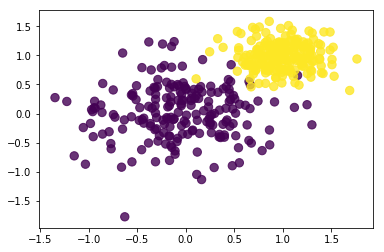

In [6]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

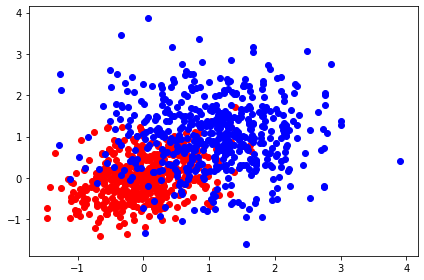

In [7]:
mean, cov = [0, 0], [(0.3,0.1),(0.1,0.3)]
data = np.random.multivariate_normal(mean,cov,500)
df_1 = pd.DataFrame(data,columns=['x', 'y'])

mean, cov = [1, 1], [(0.7,0),(0,0.7)]
data = np.random.multivariate_normal(mean,cov,500)
df_2 = pd.DataFrame(data,columns=['x', 'y'])

plt.scatter(df_1['x'], df_1['y'], c='r', edgecolor='r')
plt.scatter(df_2['x'], df_2['y'], c='b', edgecolor='b')

plt.tight_layout()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [8]:
import pickle

file_name = "data/residuals_261.pkl"

# dic = pd.read_pickle(file_name)
infile = open(file_name, 'rb')
dic = pickle.load(infile)
infile.close()

df = pd.DataFrame(dic.item())
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [9]:
# Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
df_clean = df [df['residuals'].abs() < 2]
df_clean

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


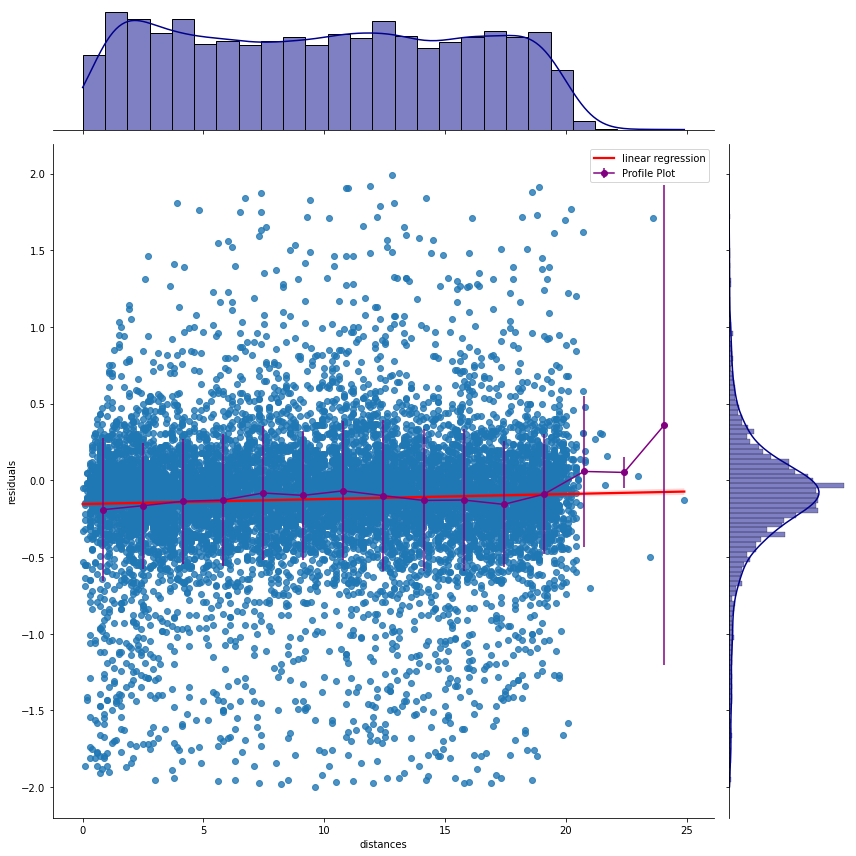

In [10]:
# Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression.
s = sns.jointplot(x="distances", y="residuals", data=df_clean, kind="reg", 
                  joint_kws={'line_kws':{'color':'red', 'label':'linear regression'}},
                  marginal_kws={'color':'darkblue'})

s.fig.set_size_inches(12,12)

plt.sca(s.ax_joint)

nbins = 15
# Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
h, b = np.histogram(df_clean['distances'], nbins, range=(df_clean['distances'].min(),df_clean['distances'].max()))

# x, the array of bin centers of the profile histogram of the "distance" variable
x = 0.5*(b[1:]+b[:-1])

# y, the mean values of the "residuals", estimated in slices (bins) of "distance"
y = np.array([df_clean.loc[(df_clean['distances']>=b[i]) & (df_clean['distances']<=b[i+1])]['residuals'].mean() for i in range(nbins)])

# err_y, the standard deviation of the "residuals", estimated in slices (bins) of "distance"
err_y = np.array([df_clean.loc[(df_clean['distances']>b[i]) & (df_clean['distances']<b[i+1])]['residuals'].std() for i in range(nbins)])

# Plot the profile plot on top of the scatter plot
plt.errorbar(x,y,yerr=err_y, label='Profile Plot',linewidth=1.5,color='purple',marker='o')
s.ax_joint.legend()
s.fig.tight_layout()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


<Figure size 1440x1440 with 0 Axes>

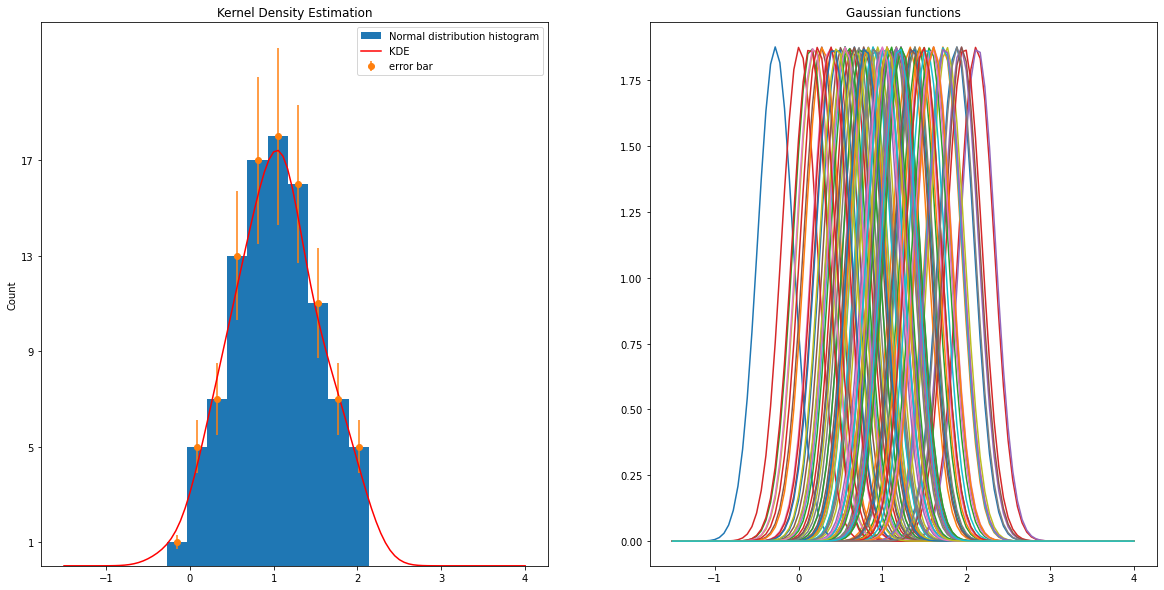

In [2]:
# set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
N,mean,std = 100,1,0.5
np.random.seed(0)
x = np.random.normal(loc=mean, scale=std, size=N)

plt.figure(figsize=(20,20))
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
y, bins, _ = ax1.hist(x,bins=10, label='Normal distribution histogram')

ax1.set_ylabel('Count')
ax1.set_title('Kernel Density Estimation')
ax1.set_yticks(ticks=np.arange(y.min(),y.max(),4))

center = 0.5*(bins[1:]+bins[:-1])
error = 0.1 + 0.2 * y
ax1.errorbar(center, y, yerr = error, fmt='o', ls='none', label='error bar', drawstyle='steps-pre')

gaussians = []
for element in x:
    ## x-axis for the plot
    x_data = np.linspace(-1.5,4,x.size)
    ## y-axis for the gaussian
    y_data = stats.norm.pdf(x_data,element, 1.06*x.std()*x.size**(-1/5))
    gaussians.append(y_data)
    ax2.plot(x_data,y_data)
ax2.set_title('Gaussian functions')

Sum = np.sum(gaussians,axis=0)/(x.size)*sp.integrate.trapezoid(y,bins[1:])
ax1.plot(x_data, Sum, label='KDE', c='r')
ax1.legend()